# Country greenhouse gas emissions from the non-renewable fraction of woodfuel used in households in non-developed countries

##### This analysis explores:
##### - The greenhouse gas emissions from the non-renewable fraction of woodfuel used in households per world region per year for carbone dioxide (CO2), methane (CH4), nitous oxide (N2O) and the CO2 equivalent (AR5)
##### - For year 2019 correlates gas emissions per country with GPD

##### Dataset from: [![DOI](https://zenodo.org/badge/DOI/10.5281/zenodo.7310933.svg)](https://doi.org/10.5281/zenodo.7310933)

### Import packages

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

### Import df

In [9]:
gas_emissions_df = pd.read_csv('D:\\Documentos\\Mine\\DC_python\\Practice\\Gas_emissions\\nrbwoodfuel_emissions.csv'\
                               , index_col = 0)

### Explore df

In [10]:
print(gas_emissions_df.shape)

print(gas_emissions_df.info())

print(gas_emissions_df.head)

(13864, 7)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 13864 entries, 1 to 13864
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AreaName     13864 non-null  object 
 1   ISO3         13800 non-null  object 
 2   ItemName     13864 non-null  object 
 3   ElementName  13864 non-null  object 
 4   Year         13864 non-null  int64  
 5   Value        13864 non-null  float64
 6   Unit         13864 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 866.5+ KB
None
<bound method NDFrame.head of           AreaName ISO3                                    ItemName  \
1      Afghanistan  AFG  Non-renewable Household Woodfuel Emissions   
2      Afghanistan  AFG  Non-renewable Household Woodfuel Emissions   
3      Afghanistan  AFG  Non-renewable Household Woodfuel Emissions   
4      Afghanistan  AFG  Non-renewable Household Woodfuel Emissions   
5      Afghanistan  AFG  Non-renewable Household 

### Explore countries and classify them by world region

In [11]:
print(gas_emissions_df["AreaName"].unique())

# Create dictionary with countries per region
Regions = {"Africa": ["Algeria", "Angola", "Botswana", "Burundi", "Cameroon", "Cabo Verde", "Central African Republic", \
                      "Chad", "Comoros", "Mayotte", "Congo", "Democratic Republic of the Congo", "Benin", "Ethiopia", \
                      "Eritrea","Djibouti", "Gabon", "Gambia", "Ghana", "Guinea", "Côte d'Ivoire", "Kenya", "Lesotho", \
                      "Liberia", "Libya", "Madagascar", "Malawi", "Mali", "Mauritania", "Mauritius", "Morocco", \
                      "Mozambique", "Namibia", "Niger", "Nigeria", "Guinea-Bissau", "Réunion", "Rwanda", "Saint Helena", \
                      "Sao Tome and Principe", "Senegal", "Seychelles", "Sierra Leone", "Somalia", "South Africa", \
                      "Zimbabwe", "South Sudan", "Sudan", "Eswatini", "Togo", "Tunisia", "Uganda", "Egypt", \
                      "United Republic of Tanzania", "Burkina Faso", "Zambia"],
           "Central America and the Caribbean": ["Mexico", "Antigua and Barbuda", "Belize", "British Virgin Islands", \
                                                 "Costa Rica", "Cuba", "Dominica", "Dominican Republic", "El Salvador", \
                                                 "Equatorial Guinea", "Grenada", "Guadeloupe", "Guatemala", "Haiti", \
                                                 "Honduras", "Jamaica", "Curaçao", "Aruba", "Sint Maarten (Dutch part)", \
                                                 "Bonaire, Sint Eustatius and Saba", "Nicaragua", "Panama", \
                                                 "Saint Kitts and Nevis", "Anguilla", "Saint Lucia", \
                                                 "Saint Vincent and the Grenadines", "Trinidad and Tobago", \
                                                 "Turks and Caicos Islands"],
           "South America": ["Argentina", "Bolivia (Plurinational State of)", "Brazil", "Chile", "Colombia", "Ecuador", \
                             "Falkland Islands (Malvinas)", "French Guiana", "Guyana", "Paraguay", "Peru", "Suriname", \
                             "Uruguay", "Venezuela (Bolivarian Republic of)"],
           "Eastern Asia": ["China", "Republic of Korea", "China, Macao Special Administrative Region", "Mongolia"],
           "Southern Asia": ["Afghanistan", "Bangladesh", "Bhutan", "Sri Lanka", "India", "Iran (Islamic Republic of)", \
                             "Maldives", "Nepal", "Pakistan"],
           "South-Eastern Asia": ["Brunei Darussalam", "Myanmar", "Cambodia", "Indonesia", \
                                  "Lao People's Democratic Republic", "Malaysia", "Philippines", "Timor-Leste", \
                                  "Viet Nam"],
           "Oceania": ["Solomon Islands", "Fiji", "New Caledonia", "Vanuatu", "Papua New Guinea"]}

# Swap keys
d = {k: oldk for oldk, oldv in Regions.items() for k in oldv}

# Add region column
gas_emissions_df["Region"] = gas_emissions_df["AreaName"].map(d)

print(gas_emissions_df.head())

# Identify entries in the dictionary of regions that need to be corrected (remove missing values)
print(gas_emissions_df.isna().any())
print(gas_emissions_df[gas_emissions_df["Region"].isnull() == True])

['Afghanistan' 'Algeria' 'Angola' 'Antigua and Barbuda' 'Argentina'
 'Bangladesh' 'Bhutan' 'Bolivia (Plurinational State of)' 'Botswana'
 'Brazil' 'Belize' 'Solomon Islands' 'British Virgin Islands'
 'Brunei Darussalam' 'Myanmar' 'Burundi' 'Cambodia' 'Cameroon'
 'Cabo Verde' 'Central African Republic' 'Sri Lanka' 'Chad' 'Chile'
 'China' 'Colombia' 'Comoros' 'Mayotte' 'Congo'
 'Democratic Republic of the Congo' 'Costa Rica' 'Cuba' 'Benin' 'Dominica'
 'Dominican Republic' 'Ecuador' 'El Salvador' 'Equatorial Guinea'
 'Ethiopia' 'Eritrea' 'Falkland Islands (Malvinas)' 'Fiji' 'French Guiana'
 'Djibouti' 'Gabon' 'Gambia' 'Ghana' 'Grenada' 'Guadeloupe' 'Guatemala'
 'Guinea' 'Guyana' 'Haiti' 'Honduras' 'India' 'Indonesia'
 'Iran (Islamic Republic of)' "Côte d'Ivoire" 'Jamaica' 'Kenya'
 'Republic of Korea' "Lao People's Democratic Republic" 'Lesotho'
 'Liberia' 'Libya' 'China, Macao Special Administrative Region'
 'Madagascar' 'Malawi' 'Malaysia' 'Maldives' 'Mali' 'Mauritania'
 'Mauritius' 'Mex


### Subset by type of gas

In [12]:
CO2_df = gas_emissions_df[gas_emissions_df["ElementName"] == "Emissions (CO2)"]
print(CO2_df.head)

CH4_df = gas_emissions_df[gas_emissions_df["ElementName"] == "Emissions (CH4)"]
print(CH4_df.head)

N2O_df = gas_emissions_df[gas_emissions_df["ElementName"] == "Emissions (N2O)"]
print(N2O_df.head)

CO2_eq_df = gas_emissions_df[gas_emissions_df["ElementName"] == "Emissions (CO2eq) (AR5)"]
print(CO2_eq_df.head)

<bound method NDFrame.head of           AreaName ISO3                                    ItemName  \
1      Afghanistan  AFG  Non-renewable Household Woodfuel Emissions   
5      Afghanistan  AFG  Non-renewable Household Woodfuel Emissions   
9      Afghanistan  AFG  Non-renewable Household Woodfuel Emissions   
13     Afghanistan  AFG  Non-renewable Household Woodfuel Emissions   
17     Afghanistan  AFG  Non-renewable Household Woodfuel Emissions   
...            ...  ...                                         ...   
13845       Zambia  ZMB  Non-renewable Household Woodfuel Emissions   
13849       Zambia  ZMB  Non-renewable Household Woodfuel Emissions   
13853       Zambia  ZMB  Non-renewable Household Woodfuel Emissions   
13857       Zambia  ZMB  Non-renewable Household Woodfuel Emissions   
13861       Zambia  ZMB  Non-renewable Household Woodfuel Emissions   

           ElementName  Year        Value        Unit         Region  
1      Emissions (CO2)  1991   285.076576  kil


## Explore CO2 per region and year

In [13]:
# Statistics
print(CO2_df.groupby(["Region", "Year"])["Value"].mean())
print(CO2_df.groupby(["Region", "Year"])["Value"].median())
print(CO2_df.groupby(["Region", "Year"])["Value"].min())
print(CO2_df.groupby(["Region", "Year"])["Value"].max())
print(CO2_df.groupby(["Region", "Year"])["Value"].var())
print(CO2_df.groupby(["Region", "Year"])["Value"].std())

Region         Year
Africa         1990     3803.387264
               1991     3802.988095
               1992     3892.861777
               1993     3977.411108
               1994     4804.701011
                           ...     
Southern Asia  2015    21089.121387
               2016    21026.039887
               2017    20910.659784
               2018    20787.766991
               2019    20774.713574
Name: Value, Length: 210, dtype: float64
Region         Year
Africa         1990    1027.336919
               1991    1011.969679
               1992    1074.130935
               1993    1076.563488
               1994    1096.190114
                          ...     
Southern Asia  2015    4912.884303
               2016    4912.884303
               2017    4914.931485
               2018    4914.931485
               2019    4914.931485
Name: Value, Length: 210, dtype: float64
Region         Year
Africa         1990    0.520715
               1991    0.520715
             

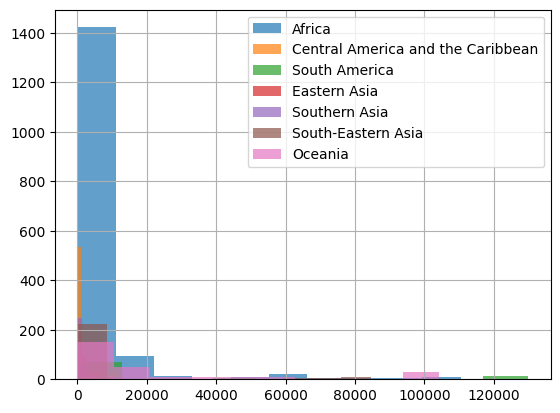

In [7]:
# Plots
## Distributions per region
CO2_df.groupby(["Region"])["Value"].hist(alpha = 0.7)
plt.legend(["Africa", "Central America and the Caribbean", "South America", "Eastern Asia", "Southern Asia", "South-Eastern Asia", "Oceania"])
plt.show()